In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
train = pd.read_csv('titanic_train.csv')

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


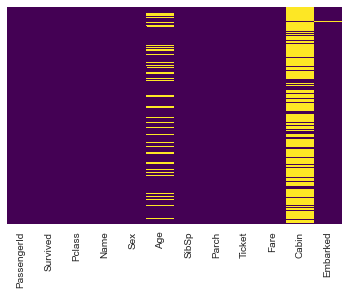

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [45]:
sns.set_style('whitegrid')

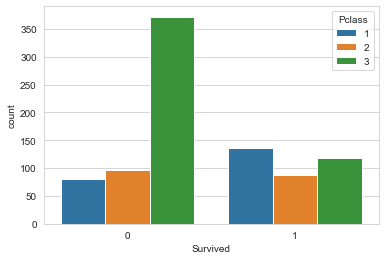

In [46]:
sns.countplot(x='Survived', hue='Pclass',data=train, )

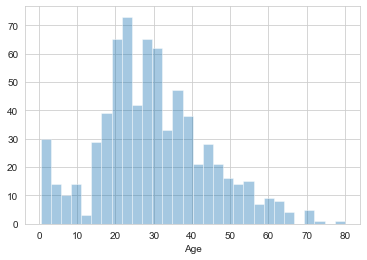

In [47]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

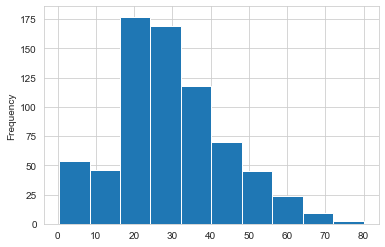

In [24]:
train['Age'].plot.hist()

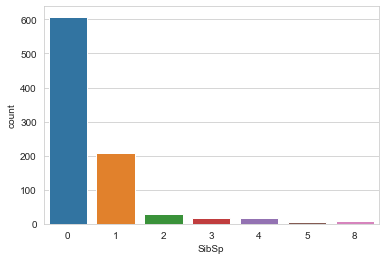

In [27]:
sns.countplot(x='SibSp', data=train)

In [28]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [29]:
from sklearn.linear_model import LogisticRegression

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [72]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

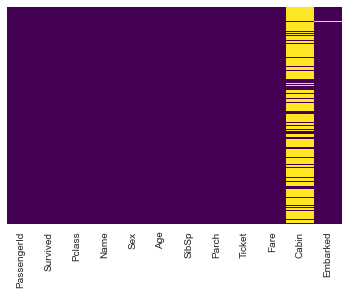

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [74]:
train.drop('Cabin', axis=1, inplace=True)

In [77]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [78]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [80]:
train = pd.concat([train, sex, embark], axis=1)

In [82]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [84]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [89]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [88]:
train.drop('PassengerId', axis=1, inplace=True)

In [90]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression

In [1]:
logmodel = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [95]:
logmodel.fit(X_train, y_train)

/Users/saurabhrane/Documents/ml_programs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2]:
predictions = logmodel.predict(X_test)

NameError: name 'logmodel' is not defined

In [1]:
from sklearn.metrics import classification_report

In [ ]:
c